# Traditional Machine Learning

- ### Objective

    - The purpose is to classify background and signal, using a set of features extracted from the CMS experiements. 
- ### How We Will Meet Our Objective? 
    - We will Apply dimensionality reduction technique (PCA) and train a model using the reduced set of principal components (Attributes/dimension). 
    - Then we will build RandomForest on PCA components to see how the model perform on the reduced set of dimension. 

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import seaborn as sns
from matplotlib.legend_handler import HandlerLine2D
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler, normalize
from  sklearn.ensemble import RandomForestClassifier
import warnings 
warnings.filterwarnings('ignore')

## Loading Data and Cleaning
- ### Exploratory Data Analysis (EDA)

    - Finding Any Missing Value
    - Finding Outliers
    - Understanding attributes using descriptive statistics
    - visualizing attribute distribution using univariate and multivariate analysis
    - Finding attribute correlation and analysing which attribute is more important


In [3]:
np.random.seed(2000)

In [4]:
balance_lep2_data = pd.read_csv('datasets/balance_lept2_data.csv')
balance_lep3_data = pd.read_csv('datasets/balance_lept3_data.csv')
lep2_data = pd.read_csv('datasets/lept2_data.csv')


In [9]:
balance_lep2_data.head(4)

label  eventWeightLumi  nElectron  Electron_pt0  Electron_mass0  \
0      0         0.002513        1.0     19.009584        0.003319   
1      0         0.024149        1.0     25.734653        0.022995   
2      1         0.000255        1.0     34.951527       -0.011841   
3      1         0.000236        1.0     17.379463        0.005299   

   Electron_charge0  Electron_phi0  Electron_eta0  Electron_pt1  \
0               1.0      -2.602539      -0.283142           0.0   
1               1.0       1.606201      -1.888672           0.0   
2               1.0       1.546631       0.780518           0.0   
3               1.0       1.045654      -1.024170           0.0   

   Electron_mass1  ...  isSingleMuIsoTrigger  Muon_pfRelIso03_all  \
0             0.0  ...                   1.0             0.011195   
1             0.0  ...                   1.0             0.016867   
2             0.0  ...                   1.0             0.000000   
3             0.0  ...                   1.0             0.000000   

   Muon_pfRelIso03_all_1  Muon_pfRelIso03_all_2  Electron_cutBased  \
0               0.000000               0.000000                3.0   
1               0.000000               0.000000                4.0   
2               0.068698               0.000000                4.0   
3               0.015056               0.010684                0.0   

       Z_mass  nCleanJet  nBJet  \
0   27.018661        4.0    1.0   
1  110.200218        2.0    0.0   
2   71.641747        4.0    1.0   
3   27.429195        3.0    1.0   

                                        file_root  \
0  72A311F5-8F88-4546-81D3-30802B1D836C_Skim.root   
1  D533B9C6-8964-C244-9F3C-D2AE36E5F7FE_Skim.root   
2  903EEDCA-58EB-FB4B-A261-31FC0BDF3202_Skim.root   
3  A3C3E6F0-51FE-2042-A3AC-2BFF37CA3EAF_Skim.root   

                                             PROCESS  
0  ../CMS/ntuple/TTZToLLNuNu_M-10_TuneCP5_13TeV-a...  
1  ../CMS/ntuple/WZTo3LNu_TuneCUETP8M1_13TeV-amca...  
2  ../CMS/ntuple/TT_FCNC-aTtoHJ_Tleptonic_HToWWZZ...  
3  ../CMS/ntuple/TT_FCNC-aTtoHJ_Tleptonic_HToWWZZ...  

[4 rows x 64 columns]

In [10]:
def clean_dataset(dataset):
    """Drop  the columns that will  not be used for analysis"""
    data = dataset.drop(columns = ["PROCESS","file_root", "eventWeightLumi"])
    clean_data = data.copy()
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean', verbose=1)
    clean_data = clean_data.iloc[:,0:53]
    transformed_values= imputer.fit_transform(clean_data)
    clean_data = pd.DataFrame(transformed_values, columns = clean_data.columns)
    return clean_data

In [11]:
clean_data = clean_dataset(balance_lep2_data)

In [12]:
# plt.style.use('seaborn-whitegrid')
# clenlep2.hist(bins=20, figsize=(60,40), color='lightblue', edgecolor = 'yellow')
# plt.show()

### Preprocessing the data
- Standardization helps in dealing with the different scale issues present in the dataset generally
- features with different scales 

In [13]:
def preprocessing(clean_data):
    # transform (centralize) the entire X (independent variable data) 
    # to normalize it using Standardscalar through transformation. 
    # We will create the PCA dimensions from this distribution. 
    X = clean_data.iloc[:,1:].values
    y = clean_data.iloc[:,0]
    ss = StandardScaler()
    standard_x =  ss.fit_transform(X)
    standard_x = normalize(standard_x)
    clean_data = pd.DataFrame(standard_x, columns = clean_data.iloc[:, 1:].columns)
    return clean_data, standard_x, y

In [16]:
daat, standard_x, y = preprocessing(clean_data)

### Understanding the relationship between all independent attribute
- data correlation:
    - A way to understand the relationship between multiple variables and attributes in your dataset. 
- Correlation, gives some insights such as:
 - One or multiple attributes depend on another attribute
 - One or multiple attributes are associated with other attributes.

Spearman and Pearson are two statistical methods to calculate the strength of correlation between two variables or attributes. Pearson Correlation Coefficient can be used with continuous variables that have a linear relationship.

In [17]:
def correlation_heatmap(data, tittle, verbose = True, pca = False):
    if verbose:
        correlation = data.drop(["Muon_mass0", "Muon_mass1"], axis=1).corr(method='pearson')
    if pca:
        correlation = data.corr(method='pearson')
    plt.figure(figsize=(16,8))
    df_lt = correlation.where(np.tril(np.ones(correlation.shape)).astype(np.bool))
    sns.heatmap(df_lt,cmap="Spectral")
    plt.title(tittle)
    plt.show()

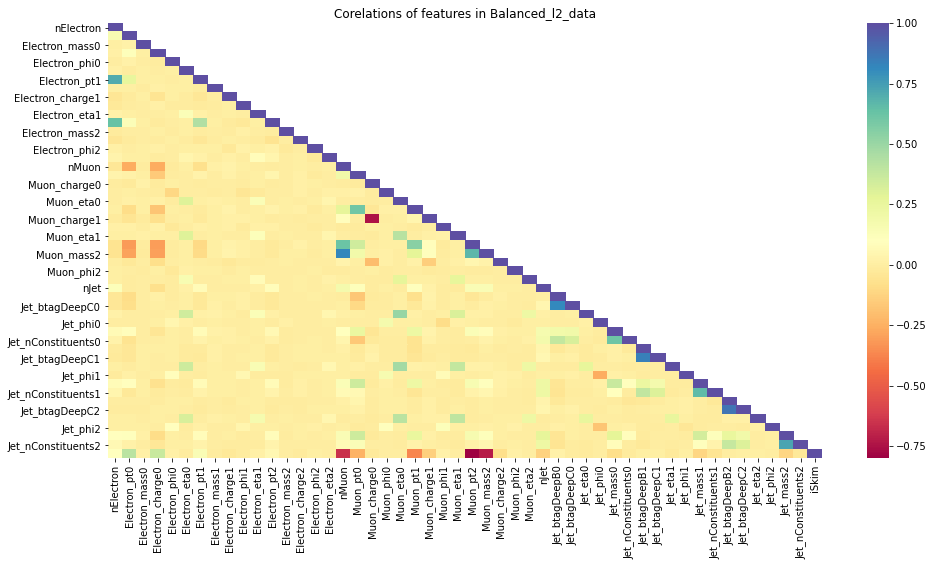

In [18]:
correlation_heatmap(daat, "Corelations of features in Balanced_l2_data")

###  Insights:
 - Notice that Electron_eta1 is strongly positve correlated to nElectron and Muon_charge1 has a strong negative linear relationship with jet_nConstituents2

### Feature Engineering and Feature Extraction
- ### Feature Selection
    - since our objective is to classify background and signal based on input features, 
    - so we base on the assumption that is there is little or no multicollinearity between the features. 
    - If our dataset has perfectly positive or negative attributes as can be obseverd from our correlation analysis, there is a high chance that the performance of the model will be impacted by a problem called — “Multicollinearity”. 
    - Multicollinearity happens when one predictor variable in a multiple regression model can be linearly predicted from the others with a high degree of accuracy. 
    - This can lead to skewed or misleading results.
    - If two features are highly correlated then there is no point using both features.
    - In that case, we can drop one feature. SNS heatmap gives us the correlation matrix where we can see which features are highly correlated.

### Dimension reduction using Principle Component Analysis (PCA)
- ### Principal Component Analysis(PCA)
    - Basically PCA is a dimension redcuction methodology which aims to reduce a large set of (often correlated) variables into a smaller set of (uncorrelated) variables, called principal components, which holds sufficient information without loosing the the relevant info much.
    ### Steps
    - normalize the dataset
    - Calculate the covariance matrix.
    - Calculate the eigenvectors and their eigenvalues.
    - Sort the eigenvectors according to their eigenvalues in descending order.
    - Choose the first K eigenvectors (where k is the dimension we'd like to end up with).
    - Build new dataset with reduced dimensionality.

#### Calculating covariance matrix

In [245]:
def cov_mtrx(standard_x,verbose = True):
    cov_mtrx = np.cov(standard_x.T)
    if verbose:
        print("\ncov_matrix shape:",cov_mtrx.shape)
        print("\n\nCovariance_matrix",cov_mtrx)
    return cov_mtrx

### Computing eigen vectors & eigen values.
- we use numpy linear algebra function

In [246]:
def compute_eig(cov_mtrx, verbose = True):
    """ compute and Sort eigenvalues in descending order
        Make a set of (eigenvalue, eigenvector) pairs:
        Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
        Extract the descending ordered eigenvalues and eigenvectors
        an array of variance explained by each 
        eigen vector... there will be 52 entries as there are 52 eigen vectors
        an array of cumulative variance. There will be 52 entries with 52 th entry 
        cumulative reaching almost 100%
    """ 
    eig_values, eig_vectors = np.linalg.eig(cov_mtrx)
    if verbose:
        print('Eigen Vectors \n%s', eig_vectors)
        print('\n Eigen Values \n%s', eig_values)
    eig_pairs = [(eig_values[index], eig_vectors[:,index]) for index in range(len(eig_values))]

    eig_pairs.sort(reverse=False, key=(lambda x: x[0]))

    eig_pairs.reverse()
    sorted_eig_values = [eig_pairs[index][0] for index in range(len(eig_values))]
    sorted_eig_vectors = [eig_pairs[index][1] for index in range(len(eig_values))]
    # check if sorting worked
    if verbose:
        print('Eigenvalues in descending order: \n%s' %sorted_eig_values)
    
    tot = sum(eig_values)
    var_explained = [(i / tot) for i in sorted(eig_values, reverse=True)] 
    cum_var_exp = np.cumsum(var_explained)  
    return sorted_eig_vectors, var_explained, cum_var_exp

In [19]:
x = 2

In [250]:
cov_matrix = cov_mtrx(standard_x, verbose=False)
cov_matrix1 = cov_mtrx(xl, verbose=False)
sorted_eig_vectors, var_explained, cum_var_exp = compute_eig(cov_matrix, verbose=False)

###  Plot the explained variance and Principal Components

In [313]:
def plot_var(var_explained, cum_var_exp):
    plt.figure(figsize=(12, 8))
    plt.bar(range(1,53), var_explained, alpha=0.8, align='center', label='individual explained variance')
    plt.step(range(1,53),cum_var_exp, where = 'mid', label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.axvline(24, c='g', linestyle=':',linewidth = 4, ymax=0.74)
    plt.axhline(0.78, c='r',linestyle=':',linewidth = 4, xmax=0.46)
    plt.grid(True)
    plt.legend(loc = 'best')
    plt.show()

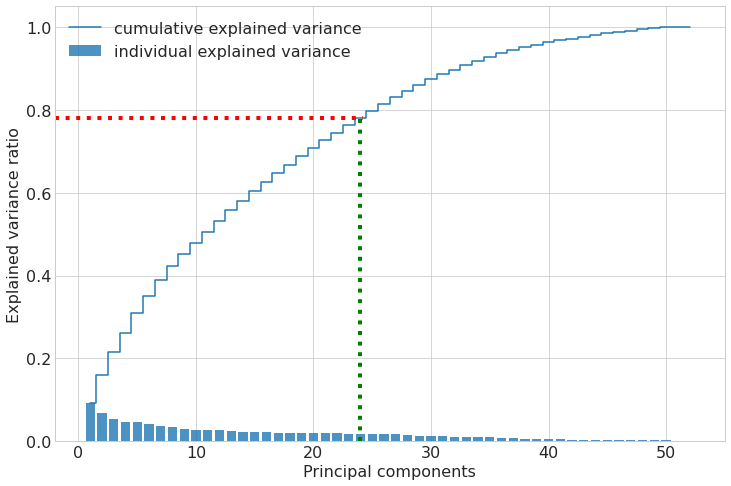

In [314]:
plot_var(var_explained, cum_var_exp)

- From above we plot we can clearly observer that 24 PC components are able to explain 78% variance of data. 
- So we will use the first 30 principal components onward and calulate the reduced dimensions. 

###  Dimensionality Reduction

- With 24 variables we can explain over 78% of the variation in the original data!

In [341]:
def dim_red(sorted_eig_vectors,standard_x):
    """
    projecting original data into principal component dimensions
    P_reduce represents reduced mathematical space
 
    """
    P_reduce = np.array(sorted_eig_vectors[0:24])  
    x_std_pca = np.dot(standard_x,P_reduce.T)
    print(np.matrix(x_std_pca))
    with open('outfile.txt','wb') as f:
        for line in np.matrix(x_std_pca):
            np.savetxt(f, line)
    pca_df = pd.DataFrame(x_std_pca,
                                columns=['PC'+str(i) for i in range(24)])
    
    return pca_df

### visualising the correlation of PC components

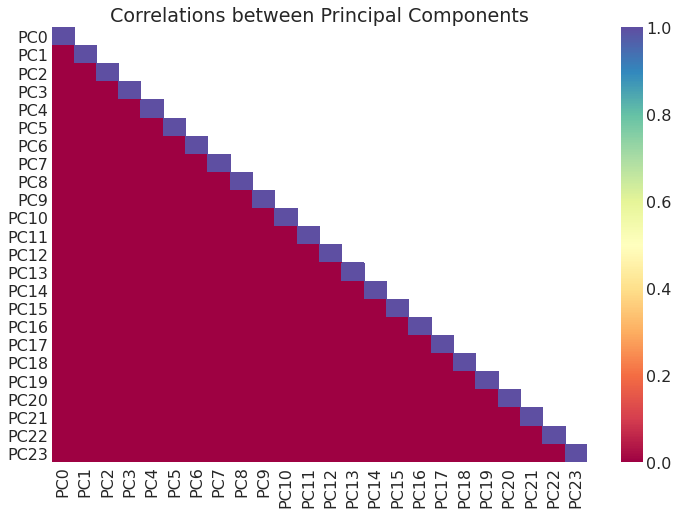

In [256]:
correlation_heatmap(pca_data, "Correlations between Principal Components", verbose=False, pca=True)

In [144]:
sns.pairplot(pca_data, diag_kind='kde') 

- It is clealry visible from the pairplot above that:
  - After dimensionality reduction using PCA the attributes become independent with no correlation among themselves. As most of them have cloud of data points with no linear kind of relationship.


### Scattering

In [257]:
def plot_decision_regions(pca_data,raw_data):    
    pca_df = pca_data.copy()
    pca_df['lab'] = raw_data['label']
    X = pca_df.iloc[:, :2].values
    y = pca_df['lab'].values
    # setup marker generator and color map
    markers = ('*', 'x')   
    colors = ('red', 'green')
    # plot the decision surface    
    h = 0.02 # step size of the mesh
    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    cmap = ListedColormap(colors[:len(np.unique(y))])    
    model = RandomForestClassifier(n_estimators=200, min_samples_split=2) # initialize the random forest object
    model.fit(X, y)
    # obtain the label for each  data point in the mesh
    Z = model.predict(np.array([xx.ravel(), yy.ravel()]).T)
    # put the results into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 8))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    # plot all samples 
    labs = ["Background", "Signal"]
    for idx, cl in enumerate(np.unique(y)):        
        plt.scatter(X[y == cl, 0], X[y == cl, 1],                    
            alpha=0.8, color=cmap(idx),                    
            marker=markers[idx], label= labs[cl])
    plt.xlabel('PC0', fontsize=14) 
    plt.ylabel('PC1', fontsize=14) 
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.show()

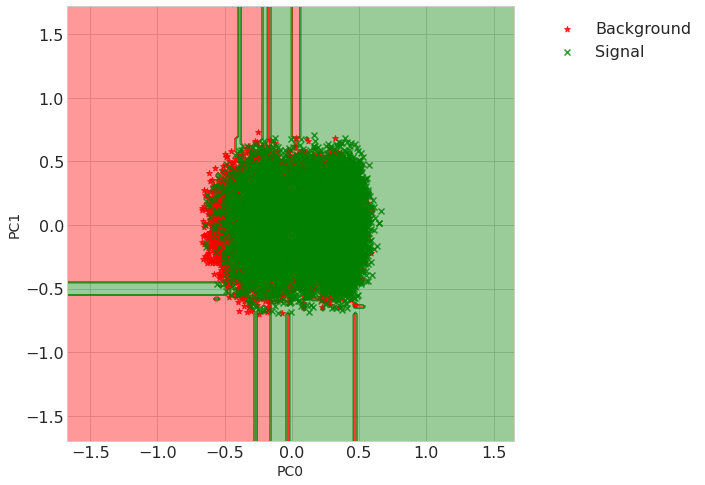

In [258]:
plot_decision_regions(pca_data,balance_lep2_data) 

- Notice that the algorithm  is able to identify two distinct  regions thus one can  tell  that after the PCA has been done, the principal components surely  contain the information of the original dataset. We therefore, confidentially use the reduced dataset for training. 

### Clustering

In [259]:
def cluster_decision_regions(pca_data, raw_data):
    pca_df = pca_data.copy()
    pca_df['lab'] = raw_data['label']
    X = pca_df.iloc[:, :2]
    yt = pca_df['lab'].values
    columns = X.iloc[:, 1:2].columns.values
    colors = ('red', 'green')
    fig = plt.figure(figsize = (10, 6))
    label = []
    for i, pc in enumerate(columns): # i   
        x_data = X[[pc,'PC0',]].values
        kmeans = KMeans(n_clusters = 2 ,init='k-means++', n_init = 10 ,max_iter=10000, 
                            tol=0.0001,  random_state= 111  , algorithm='elkan') 
        kmeans.fit(x_data)
        labels = kmeans.labels_
        centroids = kmeans.cluster_centers_
        cmap = ListedColormap(colors[:len(np.unique(yt))])
        # step size of the mesh
        h = 0.02
        # Plot the decision boundary. For that, we will assign a color to each
        x_min, x_max = x_data[:, 0].min() - 1, x_data[:, 0].max() + 1
        y_min, y_max = x_data[:, 1].min() - 1, x_data[:, 1].max() + 1
        
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        
        # obtain the label for each  data point in the mesh 
        Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

        ax = fig.add_subplot(1,1,1)
        # put the results into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, alpha=0.4, cmap=cmap)
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        labs = [ "Signal", "Background"]
        for idx, cl in enumerate(np.unique(yt)):
            ax.scatter( x = pc ,y = 'PC0' , data = X , c = cmap(labels)*idx, label = labs[cl],
                        s = 300 )
           
            ax.scatter(x = centroids[:, 0], y =  centroids[:, 1] ,
                            s = 100 , color = cmap(idx) , alpha = 0.5)
            
        ax.set_ylabel('PC0') , 
        ax.set_xlabel(pc)
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.tight_layout()
    plt.show()

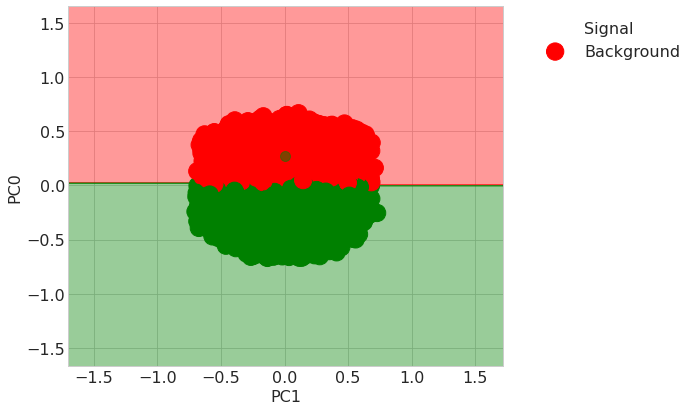

In [260]:
cluster_decision_regions(pca_data, balance_lep2_data)

#  Random Forest 
- ### Decision tree
    - A decision tree is the building block of a random forest and is an intuitive model

In [261]:
from  sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import itertools

### Splitting data into train and test sets
- use 0.3 as test_size

In [262]:
def train_test(pca_data, raw_data):
    pca_df = pca_data.copy()
    pca_df['lab'] = raw_data['label']
    #pca_df['lab'].replace(0,'Background',inplace=True)
    #pca_df['lab'].replace(1,'Signal',inplace=True)
    X = pca_df.iloc[:, 0:-2]
    y = pca_df.iloc[:, -1]
    xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.30,random_state=66)
    return xtrain,xtest,ytrain,ytest

## Training and Evaluation 

##### Plot Confusion Matrix

In [298]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 20)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 10, fontsize=14)
    plt.yticks(tick_marks, classes, size = 10, fontsize=14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)
    plt.show()
    print("\n\n\n")


In [299]:
from sklearn.metrics import roc_auc_score

In [300]:
def random_forest(xtrain,xtest,ytrain,ytest, n_trees, depth):
    # random forest model creation
    rfc = RandomForestClassifier(n_estimators=n_trees, random_state=100,  ## create n trees
                             max_features='sqrt',max_depth=depth, n_jobs=-1, verbose=0)
    rfc.fit(xtrain,ytrain)
    predict_x = rfc.predict(xtrain)
    rfc_predict = rfc.predict(xtest) # predictions
    #print("\n\n=========Classification Report Train Set============\n\n", classification_report(ytrain, predict_x))
    print("\n\n=========Classification Report Test Set============\n\n", classification_report(ytest, rfc_predict))
    roc_value = roc_auc_score(ytest, rfc.predict_proba(xtest)[:, 1])
    print(roc_value)
    cm = confusion_matrix(ytest, rfc_predict)
    plot_confusion_matrix(cm, classes = ['Background', 'Signal'],
                      title = 'Random Forest Confusion Matrix')
    
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(ytest, [1 for _ in range(len(ytest))])
    model_fpr, model_tpr, _ = roc_curve(ytest, rfc.predict_proba(xtest)[:, 1])
    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', linestyle=':',linewidth = 4, label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')



=========Classification Report Test Set============

               precision    recall  f1-score   support

           0       0.74      0.77      0.75      2484
           1       0.75      0.73      0.74      2432

    accuracy                           0.75      4916
   macro avg       0.75      0.75      0.75      4916
weighted avg       0.75      0.75      0.75      4916

0.8137675696828122
Confusion matrix, without normalization
[[1901  583]
 [ 668 1764]]


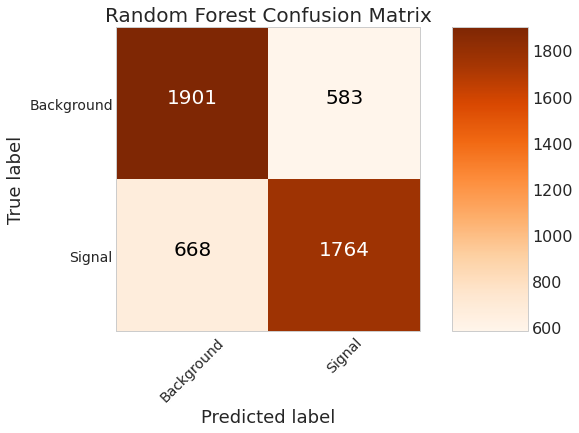

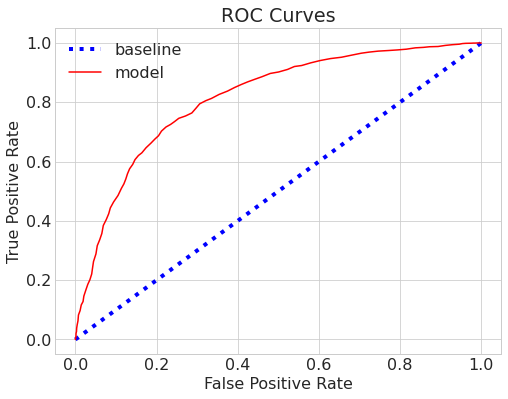

In [301]:
xtrain,xtest,ytrain,ytest = train_test(pca_data, balance_lep2_data)
random_forest(xtrain,xtest,ytrain,ytest, 100, None)

### Dependence of AUC_score with  N_estimators

- n_estimators represents the number of trees in the forest. Usually the higher the number of trees the better to learn the data. However, adding a lot of trees can slow down the training process considerably, therefore we do a parameter search to find the sweet spot

In [292]:
def AUC_score_nEstimators(xtrain,xtest,ytrain,ytest, arr_estimators):
    fig = plt.figure(figsize = (15 , 10))
    for i, n in enumerate(arr_estimators):
        n_estimators = n
        train = []
        test  = []
        for estimator in n:
            rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
            rf.fit(xtrain, ytrain)   
            train_pred = rf.predict(xtrain)   
            fpr0, tpr0, thresholds = roc_curve(ytrain, train_pred)
            roc_auc = auc(fpr0, tpr0)
            train.append(roc_auc)   
            ypred = rf.predict(xtest)   
            fpr, tpr, thresholds = roc_curve(ytest, ypred)
            roc_auc = auc(fpr, tpr)
            test.append(roc_auc)
        ax = fig.add_subplot(2,2,i+1)
        ax.plot(n_estimators, train, 'b', label="Train AUC")
        ax.plot(n_estimators, test, 'r', label="Test AUC")
        #ax.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
        ax.set_ylabel("AUC score")
        ax.set_title("Variation of score with number of estimators = {} ".format(n_estimators[-1]))
        ax.set_xlabel("n_trees")
        ax.legend()
    plt.tight_layout()
    plt.show()

In [293]:
arr_estimators = [[1, 2, 3, 5, 6], [2, 4, 6, 14, 18], [4, 8, 17, 38, 56],[5, 10, 25, 50, 250]]

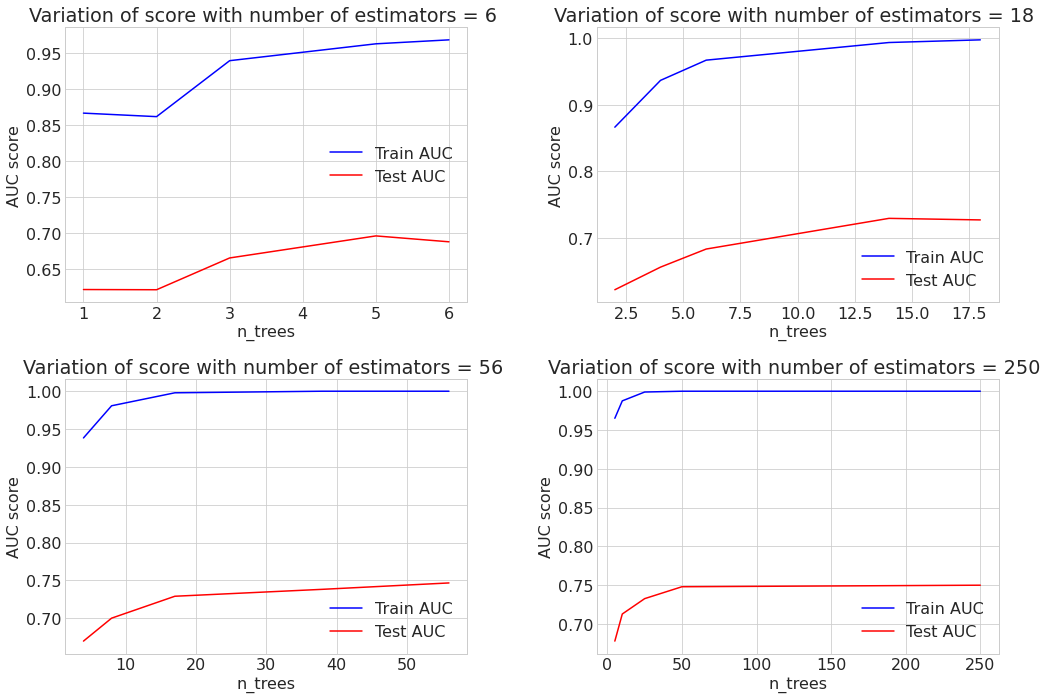

In [276]:
AUC_score_nEstimators(xtrain,xtest,ytrain,ytest, arr_estimators)

- We can see that for our data, we can stop at > 50 trees as increasing the number of trees decreases the test performance.

### Dependence of AUC_score with Max_depth
- max_depth represents the depth of each tree in the forest. The deeper the tree, the more splits it has and it captures more information about the data. We fit each decision tree with depths ranging from 1 to 32 and plot the training and test errors

In [277]:
def AUC_score_Max_depth(xtrain,xtest,ytrain,ytest, n_depths):
    fig = plt.figure(figsize = (20 , 15))
    for i, n in enumerate(n_depths):
        max_depths = np.linspace(1, n, endpoint=True)    
        train = []
        test  = []
        for d in max_depths:
            rf = RandomForestClassifier(max_depth=d, n_jobs=-1)
            rf.fit(xtrain, ytrain)   
            train_pred = rf.predict(xtrain)   
            fpr0, tpr0, thresholds = roc_curve(ytrain, train_pred)
            roc_auc = auc(fpr0, tpr0)
            train.append(roc_auc)   
            ypred = rf.predict(xtest)   
            fpr, tpr, thresholds = roc_curve(ytest, ypred)
            roc_auc = auc(fpr, tpr)
            test.append(roc_auc)
        ax = fig.add_subplot(3,3,i+1)
        ax.plot(max_depths, train, 'b', label="Train AUC")
        ax.plot(max_depths, test, 'r', label="Test AUC")
        #ax.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
        ax.set_ylabel("AUC score")
        ax.set_title("Variation of score with max__depth = {} ".format(n))
        ax.set_xlabel("Max Depth")
        ax.legend(loc='best')
    plt.tight_layout()
    plt.show()

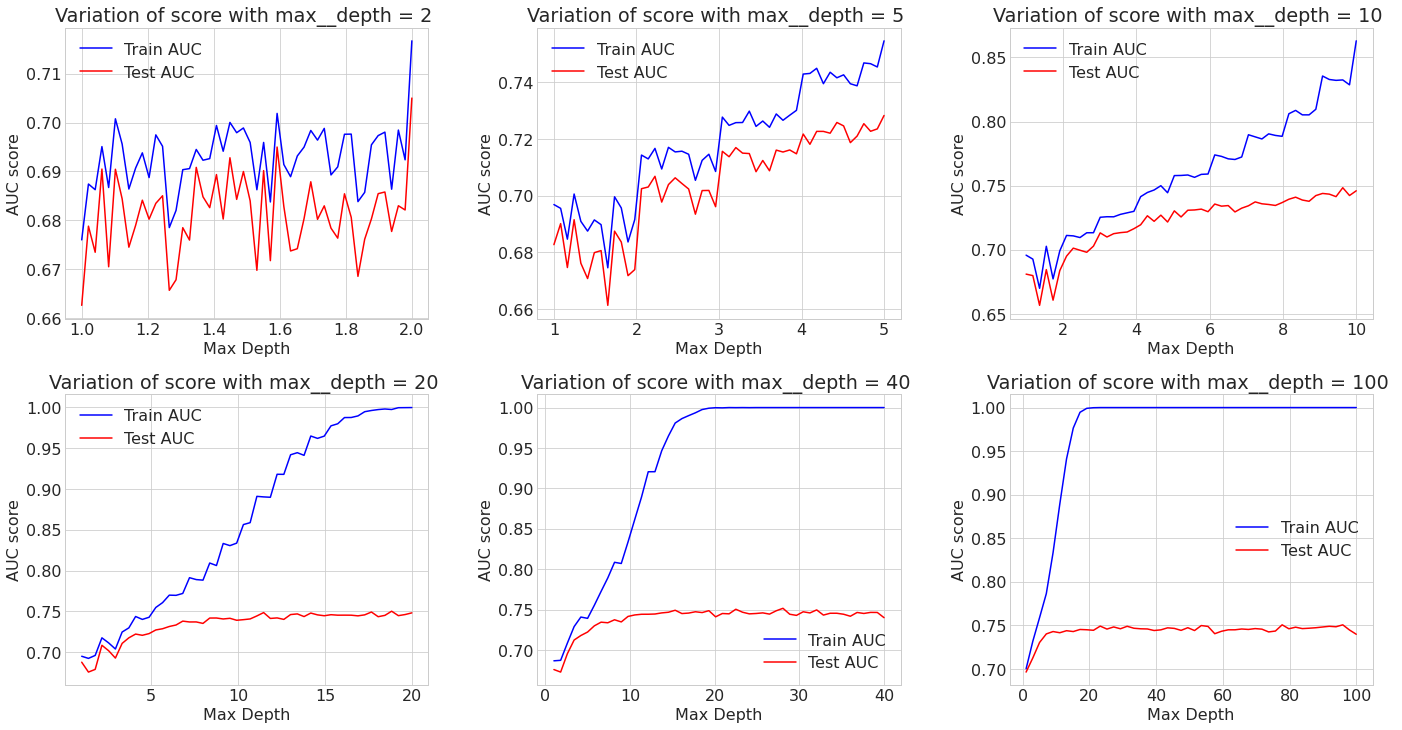

In [278]:
n_depths = [2, 5, 10, 20 , 40, 100]
AUC_score_Max_depth(xtrain,xtest,ytrain,ytest,n_depths)  

- We see that our model overfits for large depth values. The trees perfectly predicts all of the train data, however, it fails to generalize the findings for new data.
- Since the model starts failing to  fit the test set when the max_depth approximaately 60, we therefore notice that the maxmum depth required is 60. In order to verify this,  we tune the parameters using the RandomizedSearchCV then train the model. 

###  Tuning Hyperparameters
- We use RandomizedSearchCV from sklearn to optimize our hyperparamaters.

In [279]:
from sklearn.model_selection import RandomizedSearchCV

In [280]:
def model_estimator(xtrain, ytrain):# Hyperparameter grid
    param_grid = {
        'n_estimators': np.linspace(1, 250).astype(int), # number of trees in random forest
        'max_depth': [None] + list(np.linspace(2, 100).astype(int))
        }

    # Estimator for use in random search
    estimator = RandomForestClassifier(max_features = "sqrt", n_jobs=-1, verbose=0,
                                       random_state = 100)

    # Create the random search model
    rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                            scoring = 'roc_auc', cv = 10, 
                            n_iter = 10, verbose = 0, random_state=100)

    # Fit 
    rs.fit(xtrain, ytrain)
    # print results
    print("*****************Best Parameters***************\n\n",rs.best_params_)
    return rs

In [281]:
rs = model_estimator(xtrain, ytrain)

*****************Best Parameters***************

 {'n_estimators': 224, 'max_depth': 60}


### Training the model with best parameters



=========Classification Report Test Set============

               precision    recall  f1-score   support

           0       0.74      0.76      0.75      2484
           1       0.75      0.73      0.74      2432

    accuracy                           0.75      4916
   macro avg       0.75      0.75      0.75      4916
weighted avg       0.75      0.75      0.75      4916

0.8156487705525891
Confusion matrix, without normalization
[[1900  584]
 [ 656 1776]]


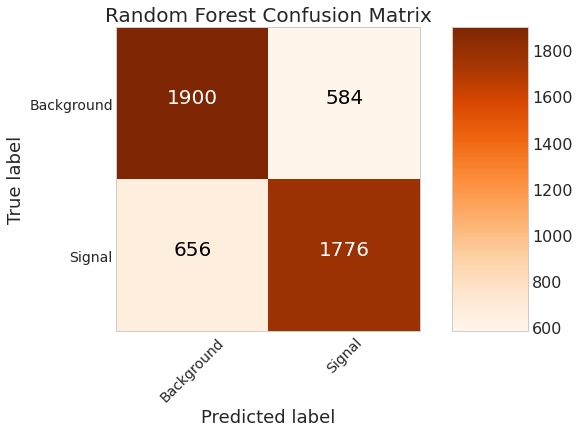

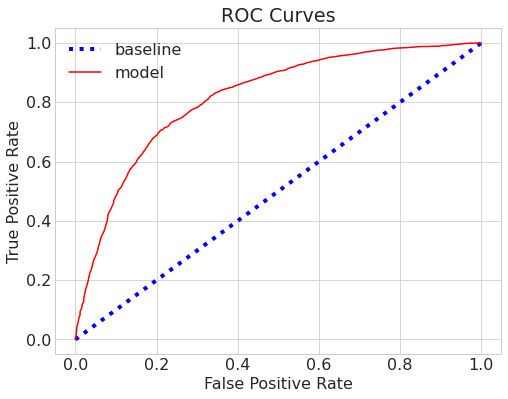

In [302]:
random_forest(xtrain,xtest,ytrain,ytest, 224, 60)

In [303]:
# # Extract feature importances
# X = clean_data.iloc[:,1:]
# y = clean_data.iloc[:,0]
# xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.30,random_state=66)

# model = RandomForestClassifier(n_estimators=204, random_state=100,  ## create n trees
#                              max_features='sqrt',max_depth=60, n_jobs=-1, verbose=0)
# model.fit(xtrain, ytrain)
# fi = pd.DataFrame({'feature': list(xtrain.columns),
#                    'importance': model.feature_importances_}).\
#                     sort_values('importance'>0.02, ascending = False)
# fi

In [304]:
from subprocess import call
from sklearn.tree import export_graphviz

In [305]:
best_model = rs.best_estimator_

In [308]:
estimator = best_model.estimators_[1]

# Export a tree from the forest
export_graphviz(estimator, 'tree_from_optimized_forest.dot', rounded = True, 
                feature_names=pca_data.iloc[:, 1:].columns, max_depth = 6, 
                class_names = ['Background', 'signal'], filled = True)

In [309]:
call(['dot', '-Tpng', 'tree_from_optimized_forest.dot', '-o', 'tree.png', '-Gdpi=300'])

0

In [310]:
from IPython.display import Image
Image('tree.png')

 # TENSOR MACHINE LEARNING

## Tensors
- Basically tensors are natural generalizations of vectors of any  dimensions. They can be defined as objects with many  indexes,a tensor of order N is an object of N indexes. 
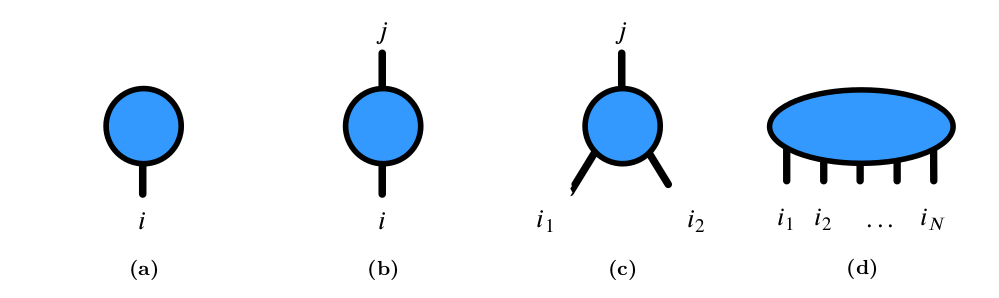
- ### Tensor Product
    - The tensor product between tensors A and B is the element wise product of all the compontents. 
    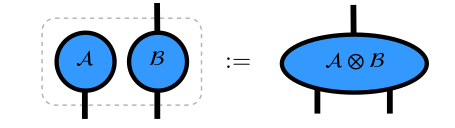
- ### Contraction 
    -  Contraction is the most important operation in tensors. It can be  seen as the product of tensors followed by  a trace between connected indexes. As can be shown below the contraction  of legs of two 3-order tensors. 
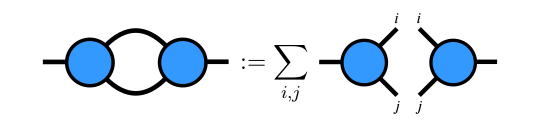

## Tensor Networks

Tensors are the building blocks of Tensor Networks. Tensor Networks is the collection of tensors connected via contracted links(indices).
Tensor networks are mathematical representations of quantum many-body states based on their entanglement structure. Below is the Stencil of a loop-free binary tree tensor network, which is the model used in Tensor Machine Learning. 
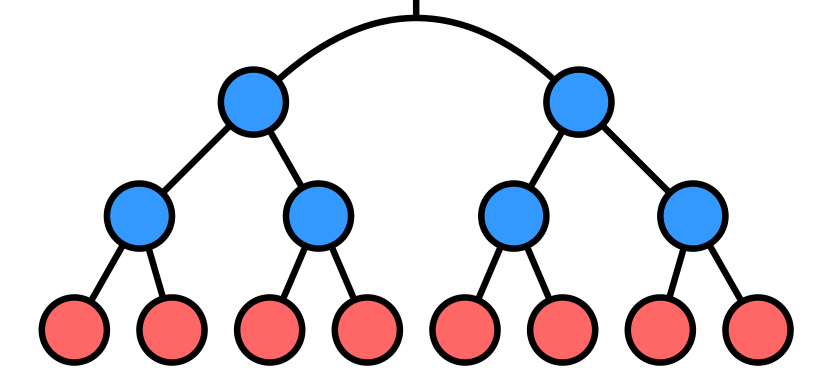
The 3-order tensors (in blue) constitutes the network that sits on top of a layer of physical sites (in red), in the machine learning framework they will be input data. The free link on top is a free physical site, it will become the prediction
of the network.